In [12]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv("A1_dataset.csv")
df.head()

,LABEL,DATE_TIME,TEXT
0,0,Fri Jun 05 14:26:50 2009,About to get threaded and scared
1,1,Thu May 14 10:13:55 2009,@awaisnaseer I like Shezan Mangooo too!!! I ha...
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...
3,1,Sun Jun 14 22:25:52 2009,@Marama Actually we start this afternoon! I w...
4,1,Sun May 31 00:42:12 2009,@gfalcone601 Aww Gi.don't worry.we'll vote for...


In [14]:
df.LABEL.value_counts()

1    2287
0    2000
Name: LABEL, dtype: int64

In [15]:
# (?<![A-Z][a-z]\.)(?<![A-Z][a-z][a-z]\.)(?<=\.|\!|\?)\s
# temp = (re.split("[\.\?\!]", df.TEXT[i]))
# m = re.search("\w\.+$|\w,+$|\w!+$|\w;+$|\w\?+|", j)

  # print(df.TEXT[i])
  # print(line_endings_prefix)
  # prefix = re.findall("[A-Z][a-z]\.\s|[A-Z][a-z][a-z]\.\s", df.TEXT[i])
  # print(prefix)

In [16]:
df['sentances'] = 0
df['sentance_count'] = 0


df['tokens_before_lowercase'] = 0
df['token_count_before_lowercase'] = 0
df['unique_tokens_before_lowercase'] = 0


df['tokens_after_lowercase'] = 0
df['token_count_after_lowercase'] = 0
df['unique_tokens_after_lowercase'] = 0


df['vowels'] = 0
df['consonants'] = 0


df['usernames'] = 0
df['count_usernames'] = 0


df['urls'] = 0
df['count_urls'] = 0


tweets_0 = {"Mon": 0, "Tue": 0, "Wed": 0, "Thu": 0, "Fri": 0, "Sat": 0, "Sun": 0}
tweets_1 = {"Mon": 0, "Tue": 0, "Wed": 0, "Thu": 0, "Fri": 0, "Sat": 0, "Sun": 0}


for i in range(df.shape[0]):
  
  # for sentances
  temp = re.split("(?<![A-Z][a-z]\.)(?<![A-Z][a-z][a-z]\.)(?<=\.|\!|\?)\s+", df.TEXT[i])
  temp = [x for x in temp if x]
  df['sentances'][i] = temp
  df['sentance_count'][i] = len(temp)

  
  # for tokens
  tokens = []
  tokens += (re.findall("[\;\,\?\!]", df.TEXT[i]))
  line_endings_prefix = re.findall("\w+\.\s", df.TEXT[i])
  tokens += re.split("\s", df.TEXT[i])
  tokens = [x for x in tokens if x]
  tokens += ["." for x in range(len(line_endings_prefix))]
  

  for index, j in enumerate(tokens):
    m = re.search("\w\!+$|\w,+$", j)
    if m:
      (s, e) = m.span()
      tokens[index] = j[:-((e-s)-1)]
  

  df['tokens_before_lowercase'][i] = tokens
  df['token_count_before_lowercase'][i] = len(tokens)
  df['unique_tokens_before_lowercase'][i] = len(set(tokens))
  

  # for lower case tokens
  df.TEXT[i] = df.TEXT[i].lower()
  tokens = []
  tokens += (re.findall("[\;\,\?\!]", df.TEXT[i]))
  line_endings_prefix = re.findall("\w+\.\s", df.TEXT[i])
  tokens += re.split("\s", df.TEXT[i])
  tokens = [x for x in tokens if x]
  tokens += ["." for x in range(len(line_endings_prefix))]
  
  for index, j in enumerate(tokens):
    m = re.search("\w\!+$|\w,+$", j)
    if m:
      (s, e) = m.span()
      tokens[index] = j[:-((e-s)+1)]

  df['tokens_after_lowercase'][i] = tokens
  df['token_count_after_lowercase'][i] = len(tokens)
  df['unique_tokens_after_lowercase'][i] = len(set(tokens))
 

  # vowels and consonants
  t = " ".join(tokens)
  vowels = re.findall("(?<=^|(?<=[\s+]))[aeiouAEIOU][^\s+]*(?=[\s]|$)", t)
  consonants = re.findall("(?<=^|(?<=[\s+]))[b-df-hj-np-tv-xzB-DF-HJ-NP-TV-XZ][^\s+]*(?=[\s]|$)", t)
  df['vowels'][i] = len(vowels)
  df['consonants'][i] = len(consonants)

  
  # username
  unames = re.findall("@[a-zA-Z0-9_]+", df.TEXT[i])
  if unames:
    df['usernames'][i] = unames
    df['count_usernames'][i] = len(unames)


  # urls
  urls = re.findall("https?://[a-zA-Z0-9_\?=\@\/#=.~-]+", df.TEXT[i])
  if urls:
    df['urls'][i] = urls
    df['count_urls'][i] = len(urls)

  # days count for each week
  day = df.DATE_TIME[i].split()[0]
  if (df.LABEL[i] == 0):
    tweets_0[day] += 1
  else:
    tweets_1[day] += 1

In [17]:
df.head(5)

,LABEL,DATE_TIME,TEXT,sentances,sentance_count,tokens_before_lowercase,token_count_before_lowercase,unique_tokens_before_lowercase,tokens_after_lowercase,token_count_after_lowercase,unique_tokens_after_lowercase,vowels,consonants,usernames,count_usernames,urls,count_urls
0,0,Fri Jun 05 14:26:50 2009,about to get threaded and scared,[About to get threaded and scared ],1,"[About, to, get, threaded, and, scared]",6,6,"[about, to, get, threaded, and, scared]",6,6,2,4,0,0,0,0
1,1,Thu May 14 10:13:55 2009,@awaisnaseer i like shezan mangooo too!!! i ha...,"[@awaisnaseer I like Shezan Mangooo too!!!, I ...",2,"[!, !, !, @awaisnaseer, I, like, Shezan, Mango...",13,10,"[!, !, !, @awaisnaseer, i, like, shezan, mango...",13,10,3,5,[@awaisnaseer],1,0,0
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,"[worked on my car after work., showering then ...",4,"[;, ;, worked, on, my, car, after, work., show...",23,20,"[;, ;, worked, on, my, car, after, work., show...",23,20,4,13,0,0,0,0
3,1,Sun Jun 14 22:25:52 2009,@marama actually we start this afternoon! i w...,"[@Marama Actually we start this afternoon!, I ...",2,"[!, ,, @Marama, Actually, we, start, this, aft...",28,27,"[!, ,, @marama, actually, we, start, this, aft...",28,27,7,17,[@marama],1,0,0
4,1,Sun May 31 00:42:12 2009,@gfalcone601 aww gi.don't worry.we'll vote for...,[@gfalcone601 Aww Gi.don't worry.we'll vote fo...,1,"[@gfalcone601, Aww, Gi.don't, worry.we'll, vot...",14,13,"[@gfalcone601, aww, gi.don't, worry.we'll, vot...",14,13,1,10,[@gfalcone601],1,0,0


In [18]:
# a

temp1 = df.loc[df.LABEL == 0]
temp2 = df.loc[df.LABEL == 1]

print("Avg no. of sentances for class label 0 is :", temp1.sentance_count.sum()/temp1.shape[0])
print("Avg no. of tokens for class label 0 is :", temp1.token_count_before_lowercase.sum()/temp1.shape[0])
print()
print("Avg no. of sentances for class label 1 is :", temp2.sentance_count.sum()/temp2.shape[0])
print("Avg no. of tokens for class label 1 is :", temp2.token_count_before_lowercase.sum()/temp2.shape[0])

Avg no. of sentances for class label 0 is : 1.695
Avg no. of tokens for class label 0 is : 14.905

Avg no. of sentances for class label 1 is : 1.7586357673808484
Avg no. of tokens for class label 1 is : 14.440752076956711


In [19]:
# b

print("Total no. of word starting with consonants for class label 0 is :", temp1.consonants.sum())
print("Total no. of word starting with vowels for class label 0 is :", temp1.vowels.sum())
print()
print("Total no. of word starting with consonants for class label 1 is :", temp2.consonants.sum())
print("Total no. of word starting with vowels for class label 1 is :", temp2.vowels.sum())

Total no. of word starting with consonants for class label 0 is : 18267
Total no. of word starting with vowels for class label 0 is : 6622

Total no. of word starting with consonants for class label 1 is : 18947
Total no. of word starting with vowels for class label 1 is : 6691


In [20]:
# c

print("No. of unique tokens before lower casing for class label 0 is :", temp1.unique_tokens_before_lowercase.sum())
print("No. of unique tokens after lower casing for class label 0 is :", temp1.unique_tokens_after_lowercase.sum())
print()
print("No. of unique tokens before lower casing for class label 1 is :", temp2.unique_tokens_before_lowercase.sum())
print("No. of unique tokens after lower casing for class label 1 is :", temp2.unique_tokens_after_lowercase.sum())

No. of unique tokens before lower casing for class label 0 is : 27647
No. of unique tokens after lower casing for class label 0 is : 27571

No. of unique tokens before lower casing for class label 1 is : 30440
No. of unique tokens after lower casing for class label 1 is : 30359


In [21]:
# d

usernames1 = []
usernames2 = []

for username in temp1.usernames:
  if username:
    for u in username:
      usernames1.append(u)


for username in temp2.usernames:
  if username:
    for u in username:
      usernames2.append(u)


print("count of username for class label 0 is :", temp1.count_usernames.sum())
print("list of username for class label 0 is :", usernames1)
print()
print("count of username for class label 1 is :", temp2.count_usernames.sum())
print("list of username for class label 1 is :", usernames2)

count of username for class label 0 is : 803
list of username for class label 0 is : ['@sokendrakouture', '@flyingbolt', '@digitallearnin', '@luke', '@buckhollywood', '@alix_says', '@mykiaisosm', '@sally_that_girl', '@marginatasnaily', '@newerdeal', '@meggles89', '@ferrite', '@karon', '@ingadurgin', '@officialas', '@the_gov', '@uyennguyen_', '@peace_p', '@markvanbaale', '@fashionsourcing', '@alexispratsides', '@johnny_trouble', '@omerrr', '@babybree96', '@david_henrie', '@chriscavs', '@pinkkpaiige12', '@brettkloesel', '@laurenbotzspons', '@tommcfly', '@dougiemcfly', '@dannymcfly', '@mcflyharry', '@realkidpoker', '@rayamartin', '@affan', '@chrisworthy', '@kevridesthecab', '@allergist', '@johnpapa', '@writeplayrepeat', '@crunchpow', '@hautepersian', '@mrbenrubery', '@pickassoreborn', '@stephenfry', '@musewire', '@rosaliiinda', '@courtney319', '@mr_marty', '@gavin8', '@delbertshoopman', '@pirrofina', '@shannynb', '@cultureshockmag', '@colinmunroe', '@waledc', '@matchesmalone', '@dianalogs

In [22]:
# e

url1 = []
url2 = []

for url in temp1.urls:
  if url:
    for u in url:
      url1.append(u)

for url in temp2.urls:
  if url:
    for u in url:
      url2.append(u)


print("count of urls for class label 0 is :", temp1.count_urls.sum())
print("list of urls for class label 0 is :", url1)
print()
print("count of urls for class label 1 is :", temp2.count_urls.sum())
print("list of urls for class label 1 is :", url2)

count of urls for class label 0 is : 58
list of urls for class label 0 is : ['http://bit.ly/aebs3', 'http://twitpic.com/3l589', 'http://bit.ly/n4wl4', 'http://twitpic.com/4ijt4', 'http://tinyurl.com/ncbmmo', 'http://twitpic.com/6u8ht', 'http://bit.ly/47ethn', 'http://bit.ly/i9lsr', 'http://twitpic.com/5exx2', 'http://mypict.me/2dg2', 'http://twitpic.com/54r0g', 'http://apps.facebook.com/dogbook/profile/view/6391349', 'http://ustre.am/2fuw', 'http://twitpic.com/6h6aw', 'http://bit.ly/1g5txf', 'http://tinyurl.com/nsfan3', 'http://plurk.com/p/sy92g', 'http://twitpic.com/6uohm', 'http://twitpic.com/54r6e', 'http://twitpic.com/5ddsi', 'http://bit.ly/icbfj', 'http://twitpic.com/7lqs3', 'http://myloc.me/tey', 'http://myloc.me/4rxt', 'http://www.dryjuly.com/', 'http://plurk.com/p/z3z6p', 'http://is.gd/16lr2', 'http://twitpic.com/6fsl4', 'http://twitpic.com/8cin5', 'http://twitpic.com/7rwwa', 'http://bit.ly/16z4xz', 'http://twitpic.com/4gzhk', 'http://tinyurl.com/pemwuh', 'http://plurk.com/p/xn

In [23]:
# f

print("No. of tweets on each day of week for class label 0 is :", tweets_0)
print("No. of tweets on each day of week for class label 1 is :", tweets_1)

No. of tweets on each day of week for class label 0 is : {'Mon': 391, 'Tue': 154, 'Wed': 127, 'Thu': 171, 'Fri': 473, 'Sat': 119, 'Sun': 565}
No. of tweets on each day of week for class label 1 is : {'Mon': 481, 'Tue': 132, 'Wed': 172, 'Thu': 50, 'Fri': 391, 'Sat': 298, 'Sun': 763}


In [24]:
df.head()

,LABEL,DATE_TIME,TEXT,sentances,sentance_count,tokens_before_lowercase,token_count_before_lowercase,unique_tokens_before_lowercase,tokens_after_lowercase,token_count_after_lowercase,unique_tokens_after_lowercase,vowels,consonants,usernames,count_usernames,urls,count_urls
0,0,Fri Jun 05 14:26:50 2009,about to get threaded and scared,[About to get threaded and scared ],1,"[About, to, get, threaded, and, scared]",6,6,"[about, to, get, threaded, and, scared]",6,6,2,4,0,0,0,0
1,1,Thu May 14 10:13:55 2009,@awaisnaseer i like shezan mangooo too!!! i ha...,"[@awaisnaseer I like Shezan Mangooo too!!!, I ...",2,"[!, !, !, @awaisnaseer, I, like, Shezan, Mango...",13,10,"[!, !, !, @awaisnaseer, i, like, shezan, mango...",13,10,3,5,[@awaisnaseer],1,0,0
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,"[worked on my car after work., showering then ...",4,"[;, ;, worked, on, my, car, after, work., show...",23,20,"[;, ;, worked, on, my, car, after, work., show...",23,20,4,13,0,0,0,0
3,1,Sun Jun 14 22:25:52 2009,@marama actually we start this afternoon! i w...,"[@Marama Actually we start this afternoon!, I ...",2,"[!, ,, @Marama, Actually, we, start, this, aft...",28,27,"[!, ,, @marama, actually, we, start, this, aft...",28,27,7,17,[@marama],1,0,0
4,1,Sun May 31 00:42:12 2009,@gfalcone601 aww gi.don't worry.we'll vote for...,[@gfalcone601 Aww Gi.don't worry.we'll vote fo...,1,"[@gfalcone601, Aww, Gi.don't, worry.we'll, vot...",14,13,"[@gfalcone601, aww, gi.don't, worry.we'll, vot...",14,13,1,10,[@gfalcone601],1,0,0


In [25]:
word = input("enter a word : ")
label = int(input("enter a label (0/1) : "))
tweets = list(df.loc[df['LABEL']==label, 'TEXT'])

word_cnt = 0
sent_cnt = 0
start_sent_cnt = 0
end_sent_cnt = 0

for tweet in tweets:
    sentences = re.split(r"(?<![A-Z][a-z]\.)(?<![A-Z][a-z][a-z]\.)(?<=\.|\!|\?)\s+", tweet)
    match_flag = False
    for sentence in sentences:
        if re.search(f"^({word})(?=\s)", sentence, re.IGNORECASE):
            start_sent_cnt+=1
        if re.search(f"(?<=\s)({word})($|\.+|\!+)", sentence, re.IGNORECASE):
            end_sent_cnt+=1
        increment = len(re.findall(r"(?<![A-Za-z0-9])"+word+"(?![A-Za-z0-9])", sentence, re.IGNORECASE))
        if increment>0:
            match_flag = True
            word_cnt+=increment
            sent_cnt+=1
       
            
print("word_cnt = " + str(word_cnt) + " and sentence_cnt = " + str(sent_cnt))
print(f"{start_sent_cnt} sentences start with the word {word} and {end_sent_cnt} sentences end with it.")

enter a word : the
enter a label (0/1) : 1
word_cnt = 752 and sentence_cnt = 670
29 sentences start with the word the and 0 sentences end with it.


In [26]:
# import nltk

!pip install autocorrect
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 6.8 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=f33d2231cd29971472ef207b1e704312b6a3d753f6e7857136088776d2c25bac
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [43]:
from nltk.stem.snowball import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from autocorrect import Speller


df1 = df.iloc[:, :3]
df1['white_space_removed'] = 0
df1['tokenized_data'] = 0
df1['stopword_removed_data'] = 0
df1['punct_removed_data'] = 0
df1['url_removed_data'] = 0
df1['spelling_checked_data'] = 0
df1['lemmetized_data'] = 0
df1.head()


lemmatizer = WordNetLemmatizer()
spell = Speller(lang='en')


for i in range(df1.shape[0]):

  # white space removel
  df1['white_space_removed'][i] = re.sub("\s+", " ", df1.TEXT[i])


  # tokenization
  lower = df1['white_space_removed'][i].lower()
  tokenized_data = word_tokenize(lower)
  df1['tokenized_data'][i] = tokenized_data
  # print(tokenized_data)


  # remove stopwords
  stop_words = "|".join(stopwords.words('english'))
  pattern = re.compile(r'\b(' + stop_words + r')\b\s*')
  stopword_removed_data = [pattern.sub("", text) for text in tokenized_data]
  stopword_removed_data = [x for x in stopword_removed_data if x]
  df1['stopword_removed_data'][i] = stopword_removed_data 
  # print(stopword_removed_data)


  # punctuation removel
  punct_removed_data = [x for x in stopword_removed_data if x.isalnum()]
  df1['punct_removed_data'][i] = punct_removed_data
  # print(punct_removed_data)
  

  # remove urls and html tags
  urls = re.findall("https?://[a-zA-Z0-9_\?=\@\/#=.~-]+", " ".join(punct_removed_data))
  url_removed_data = [x for x in punct_removed_data if x not in urls]
  df1['url_removed_data'][i] = url_removed_data
  # print(url_removed_data)  


  # spelling checking
  spelling_checked_data = [spell(x) for x in url_removed_data]
  df1['spelling_checked_data'][i] = spelling_checked_data
  # print(spelling_checked_data)

  # lemmetization
  lemmas = []
  for w in spelling_checked_data:
    lemmas.append(lemmatizer.lemmatize(w, wordnet.VERB))
  df1['lemmetized_data'][i] = lemmas
  # print(lemmas)
  # print()

In [44]:
df1.head(10)

,LABEL,DATE_TIME,TEXT,white_space_removed,tokenized_data,stopword_removed_data,punct_removed_data,url_removed_data,spelling_checked_data,lemmetized_data
0,0,Fri Jun 05 14:26:50 2009,about to get threaded and scared,about to get threaded and scared,"[about, to, get, threaded, and, scared]","[get, threaded, scared]","[get, threaded, scared]","[get, threaded, scared]","[get, threaded, scared]","[get, thread, scar]"
1,1,Thu May 14 10:13:55 2009,@awaisnaseer i like shezan mangooo too!!! i ha...,@awaisnaseer i like shezan mangooo too!!! i ha...,"[@, awaisnaseer, i, like, shezan, mangooo, too...","[@, awaisnaseer, like, shezan, mangooo, !, !, ...","[awaisnaseer, like, shezan, mangooo, one, yest...","[awaisnaseer, like, shezan, mangooo, one, yest...","[awaisnaseer, like, sedan, mango, one, yesterday]","[awaisnaseer, like, sedan, mango, one, yesterday]"
2,1,Fri Jun 05 21:02:20 2009,worked on my car after work. showering then go...,worked on my car after work. showering then go...,"[worked, on, my, car, after, work, ., showerin...","[worked, car, work, ., showering, going, bed, ...","[worked, car, work, showering, going, bed, soo...","[worked, car, work, showering, going, bed, soo...","[worked, car, work, showing, going, bed, soooo...","[work, car, work, show, go, bed, sooooooooooo,..."
3,1,Sun Jun 14 22:25:52 2009,@marama actually we start this afternoon! i w...,@marama actually we start this afternoon! i wi...,"[@, marama, actually, we, start, this, afterno...","[@, marama, actually, start, afternoon, !, try...","[marama, actually, start, afternoon, try, some...","[marama, actually, start, afternoon, try, some...","[drama, actually, start, afternoon, try, somet...","[drama, actually, start, afternoon, try, somet..."
4,1,Sun May 31 00:42:12 2009,@gfalcone601 aww gi.don't worry.we'll vote for...,@gfalcone601 aww gi.don't worry.we'll vote for...,"[@, gfalcone601, aww, gi.do, n't, worry.we, 'l...","[@, gfalcone601, aww, gi., n', worry., ', vote...","[gfalcone601, aww, vote, coz, love, much]","[gfalcone601, aww, vote, coz, love, much]","[falcon601, www, vote, col, love, much]","[falcon601, www, vote, col, love, much]"
5,1,Sun May 17 03:26:30 2009,@mrstessyman what ever you do have a good day....,@mrstessyman what ever you do have a good day....,"[@, mrstessyman, what, ever, you, do, have, a,...","[@, mrstessyman, ever, good, day, ., love, kni...","[mrstessyman, ever, good, day, love, knitpicks]","[mrstessyman, ever, good, day, love, knitpicks]","[mrstessyman, ever, good, day, love, knitpicks]","[mrstessyman, ever, good, day, love, knitpicks]"
6,1,Tue Jun 16 04:39:49 2009,"@getmevideo sorry, not my forte, ask me about...","@getmevideo sorry, not my forte, ask me about ...","[@, getmevideo, sorry, ,, not, my, forte, ,, a...","[@, getmevideo, sorry, ,, forte, ,, ask, #, tr...","[getmevideo, sorry, forte, ask, trading, scalp...","[getmevideo, sorry, forte, ask, trading, scalp...","[getmevideo, sorry, forte, ask, trading, scali...","[getmevideo, sorry, forte, ask, trade, scale, ..."
7,1,Sun May 03 07:20:15 2009,getting ready for church and bummed i cannot w...,getting ready for church and bummed i cannot w...,"[getting, ready, for, church, and, bummed, i, ...","[getting, ready, church, bummed, watch, rafa, ...","[getting, ready, church, bummed, watch, rafa, ...","[getting, ready, church, bummed, watch, rafa, ...","[getting, ready, church, summed, watch, afa, w...","[get, ready, church, sum, watch, afa, whoop, d..."
8,1,Fri May 22 03:11:33 2009,up early tomorrow. last open home. goodnight,up early tomorrow. last open home. goodnight,"[up, early, tomorrow, ., last, open, home, ., ...","[early, tomorrow, ., last, open, home, ., good...","[early, tomorrow, last, open, home, goodnight]","[early, tomorrow, last, open, home, goodnight]","[early, tomorrow, last, open, home, goodnight]","[early, tomorrow, last, open, home, goodnight]"
9,0,Wed Jun 17 09:18:19 2009,needs to shake this gloomy feeling!! maybe ...,needs to shake this gloomy feeling!! maybe i

In [45]:
df1.shape

(4287, 10)

In [46]:
df1.to_csv("preprocessed_data.csv")

In [47]:
for j in range(8, 10):
  for i in df1.iloc[:2, 2:]:
    print(i, "==> ", df1[i][j])
  print()

TEXT ==>  up early tomorrow. last open home. goodnight 
white_space_removed ==>  up early tomorrow. last open home. goodnight 
tokenized_data ==>  ['up', 'early', 'tomorrow', '.', 'last', 'open', 'home', '.', 'goodnight']
stopword_removed_data ==>  ['early', 'tomorrow', '.', 'last', 'open', 'home', '.', 'goodnight']
punct_removed_data ==>  ['early', 'tomorrow', 'last', 'open', 'home', 'goodnight']
url_removed_data ==>  ['early', 'tomorrow', 'last', 'open', 'home', 'goodnight']
spelling_checked_data ==>  ['early', 'tomorrow', 'last', 'open', 'home', 'goodnight']
lemmetized_data ==>  ['early', 'tomorrow', 'last', 'open', 'home', 'goodnight']

TEXT ==>  needs to shake this gloomy feeling!!    maybe it's the rain???
white_space_removed ==>  needs to shake this gloomy feeling!! maybe it's the rain???
tokenized_data ==>  ['needs', 'to', 'shake', 'this', 'gloomy', 'feeling', '!', '!', 'maybe', 'it', "'s", 'the', 'rain', '?', '?', '?']
stopword_removed_data ==>  ['needs', 'shake', 'gloomy', 'f

Word Cloud for Class Label 0



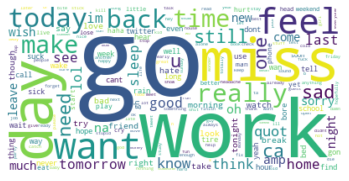



Word Cloud for Class Label 1



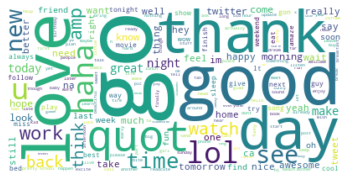

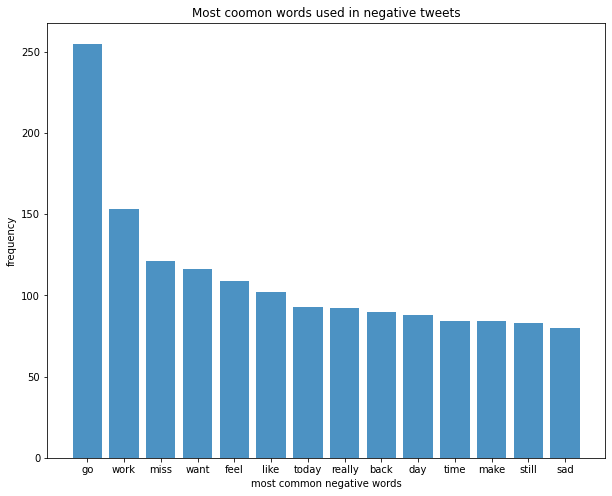

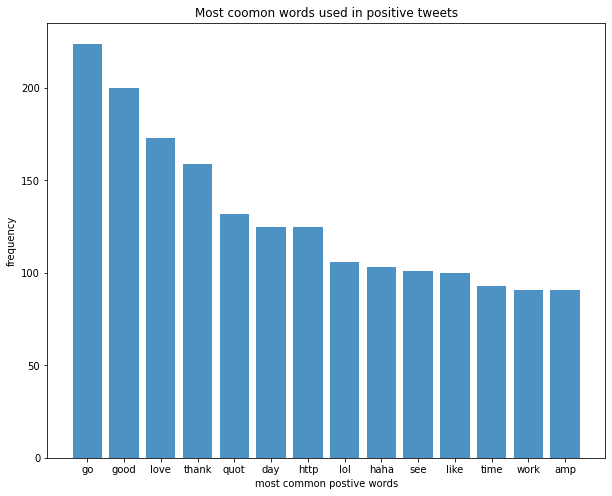

In [102]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from collections import Counter


text1 = ""
text2 = ""


for data in df1.lemmetized_data[df1.LABEL == 0]:
  text1 += " ".join(data) + " "

for data in df1.lemmetized_data[df1.LABEL == 1]:
  text2 += " ".join(data) + " "


word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(text1)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)


print("Word Cloud for Class Label 0")
print()
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()
print()
print()


print("Word Cloud for Class Label 1")
print()
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
print()
print()


temp1 = df1.loc[df.LABEL == 0]
temp2 = df1.loc[df.LABEL == 1]

lem_data_1 = list(temp1.lemmetized_data)
lem_data_2 = list(temp2.lemmetized_data)

l1 = []
l2 = []

for list1 in lem_data_1:
  l1 +=  list1

for list2 in lem_data_2:
  l2 +=  list2


d1 = Counter(l1)
d2 = Counter(l2)

x1 = d1.most_common()[1:15]
x2 = d2.most_common()[1:15]

k1 = []
v1 = []

for i,j in x1:
  k1.append(i)
  v1.append(j)

k2 = []
v2 = []

for i,j in x2:
  k2.append(i)
  v2.append(j)

plt.figure(figsize=(10, 8))
plt.bar(k1, v1, align='center', alpha=0.8)
plt.xlabel('most common negative words')
plt.ylabel('frequency')
plt.title('Most coomon words used in negative tweets')
plt.show()


plt.figure(figsize=(10, 8))
plt.bar(k2, v2, align='center', alpha=0.8)
plt.xlabel('most common postive words')
plt.ylabel('frequency')
plt.title('Most coomon words used in positive tweets')
plt.show()

In [64]:
df1[df1.LABEL == 1].shape[0]
df1.shape

(4287, 10)

In [48]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 10.0 MB/s 


In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

guesses = []
analyzer = SentimentIntensityAnalyzer()

tweets_raw = list(df1['TEXT'])
tweets_processed = list(df1['lemmetized_data'])
labels = list(df1['LABEL'])


# for raw data
for tweet in tweets_raw:
    vs = analyzer.polarity_scores(tweet)
    if vs["compound"] > 0:
        guesses.append(1)  
    else:
        guesses.append(0) 
trueVSguess_raw = [(labels[i], guesses[i]) for i in range(len(guesses))]


# for preprocessed data
guesses = []
for tweet in tweets_processed:
    vs = analyzer.polarity_scores(" ".join(tweet))
    if vs["compound"] > 0:
        guesses.append(1)  
    else:
        guesses.append(0) 

trueVSguess_processed = [(labels[i], guesses[i]) for i in range(len(guesses))]


# find accuracy
def accuracy(size, trueVSguess):
  correct = 0
  for ele in trueVSguess:
    if ele[0] == ele[1]:
          correct +=1
  return (correct/size)*100


# print statements
print("accuracy of raw data = " + str(accuracy(df1.shape[0], trueVSguess_raw)))
print("accuracy of preprocessed data = " + str(accuracy(df1.shape[0], trueVSguess_processed)))

accuracy of raw data = 65.22043386983904
accuracy of preprocessed data = 63.587590389549796
